# __The Binary Perceptron!__ 
The Perceptron is an amazing machine learning algorithm! This algorithm is specifically utilized for supervised learning. This algorithm mimicks neurons (nerve cells in brain) which process and transmit signals. The neuron recieve multiple signals that are then integrated into the cell, if the accumulated signal is bigger than the threshold an output signal is emitted.

The methodology to the Perceptron can be described by four basic steps: 
1. Recieve input from multiple sources 
2. Aggregate inputs via weighted sum 
3. Decide a threshold (for which -b will be subsituted)
4. If the weighted sum is bigger than the threshold output 1 if not output 0 

**Note:** The Perceptron will ONLY converge if the classes are linearly separable ie separated by a decision boundary.

\begin{cases}
    1 & \text{w $\cdot$ x + b}\\
    0 & \text{otherwise}
\end{cases}       

* w: weight associated with a feature in the dataset 
* x: features/inputs in the dataset 
* b: bias and also equal to -threshold

### The Perceptron Learning Rule: 
1. Initialize the weight and bias to zero 
2. For each training sample in the data, x
    * Compute the predicted class label
        * If the predicted class label is equaled to the actual class label 
            * The weight and bias are unchanged
        * If the predicted class label is NOT equaled to the actual class label 
            * The weight and bias MUST be updated
            * $\nabla$w_1 = $\eta$(y - predicted_y)x_1
            * $\nabla$b = $\eta$(y - predicted_y)

In [22]:
# Libraries
import numpy as np 
# Loading the iris dataset
from sklearn import datasets
# plotting library
import matplotlib.pyplot as plt


In [19]:
def classify(w, b, x):
    '''Returns the sign to classify the new point'''
    return np.sign(np.dot(w,x) + b)


def binary_perceptron(X, y):
    '''The Binary Perceptron Algorithm'''
    n = len(y)
    # Randomly permutating the dataset
    index = np.random.permutation(n)
    X = X[index,:]
    y = y[index]
    # Number of correctly classified labels - starts at zero 
    n_correct = 0 

    # initialize weight vector w with zeros and start b at zero 
    #  - each element of the vector corresponds to the weight associated with a feature in the dataset. 
    w = np.zeros(np.shape(X)[1]) 
    b=0
    
    # While the number of correctly classified elements if less than the number of labels
    # You could put in a max_iter or epochs - remember that the Perceptron has to be linearly separable to converge or you need to set a maximim number of passes over the dataset. 
    while(n_correct < n):
        n_correct = 0
        for i in range(n):
            y_pred = classify(w, b, X[i,:])
            if (y_pred == y[i]): # if the classified element is equaled to the label then n_correct = 1, if not update w and b
                n_correct += 1
            else:
                w = w + (y[i] * X[i,:]) # updates to w and b 
                b = b + y[i]
    return(w,b)


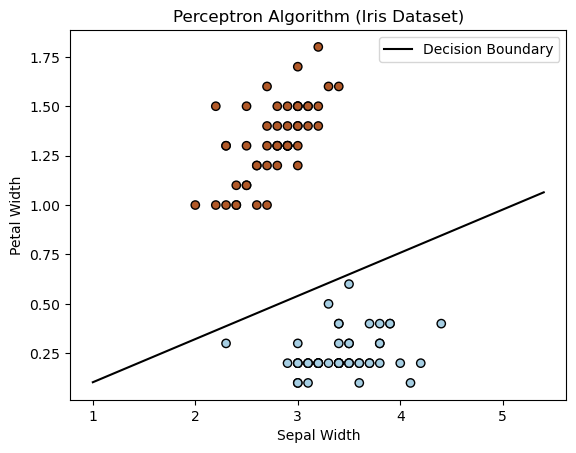

In [26]:
iris = datasets.load_iris() 
x = iris.data
y = iris.target

# Restricting the features to 1 and 3 (or the second and fourth columns)
features = x[:, [1, 3]]
#print(features)

# Restricting the labels to 0 and 1
indices = (y == 0) | (y == 1)
features = features[indices]
labels = y[indices]

# Recode label 0 as -1
# In this example's case the logic will be 1 or -1 if the weighted sum is bigger than the threshold or not
labels[labels == 0] = -1
w, b = binary_perceptron(features, labels)

# Plot the data points
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k', marker='o')

# Plot the decision boundary
x1 = np.linspace(features[:, 0].min() - 1, features[:, 0].max() + 1, 100)
x2 = (-w [0] * x1 - b) / w[1]
plt.plot(x1, x2, label='Decision Boundary', color='black')

# Add labels and legend and show that the plot is nicely linearly separable
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Perceptron Algorithm (Iris Dataset)')
plt.legend()
plt.show()